[readme](readme.md)

# Cleaning

Let's get this to something we can work with

Load file and set column names

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/auto-mpg.data',header=None,delim_whitespace=True)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model_year','origin','car_name']

Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


No nulls, but why is horsepower not a number?

In [3]:
df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [4]:
df[df.horsepower == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


I'll fill in what I can with what I can find online

In [5]:
# 1971 pinto kent I4
df.at[32,'horsepower'] = '75.0'
# 1974 maverick 200 I6
df.at[126,'horsepower'] = '85.0'
# 1980 renault lecar deluxe 85ci I4
df.at[330,'horsepower'] = '53.5'
# 1980 ford mustang cobra
# they seem confused between 2 different models
# 1981 renault 18i
df.at[354,'horsepower'] = '81.5'
#1982 AMC concord dl 151
df.at[374,'horsepower'] = '90'

We'll ignore the mustang because it's too far off from realistic, it looks like they got confused between two different models.

Anyway, drop all '?' horsepower

In [6]:
df.drop(df[df.horsepower == '?'].index,inplace=True)
df['horsepower'] = df.horsepower.astype(float)
df.reset_index(inplace=True,drop=True)

And set to floats, like the rest

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    float64
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model_year    397 non-null    int64  
 7   origin        397 non-null    int64  
 8   car_name      397 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.0+ KB


Looks good

### Min/Max to check range

In [8]:
for col in df.columns[:-1]:
    print(f'''{col}
Min: {df[col].min()}  
Max: {df[col].max()}
''')

mpg
Min: 9.0  
Max: 46.6

cylinders
Min: 3  
Max: 8

displacement
Min: 68.0  
Max: 455.0

horsepower
Min: 46.0  
Max: 230.0

weight
Min: 1613.0  
Max: 5140.0

acceleration
Min: 8.0  
Max: 24.8

model_year
Min: 70  
Max: 82

origin
Min: 1  
Max: 3



All of this makes sense

In [9]:
df[df.car_name.duplicated()].car_name.unique()

array(['datsun pl510', 'amc gremlin', 'chevrolet chevelle malibu',
       'chevrolet impala', 'ford galaxie 500', 'plymouth fury iii',
       'pontiac catalina', 'amc matador', 'amc hornet', 'ford maverick',
       'plymouth duster', 'chevrolet vega', 'ford pinto',
       'toyota corolla 1200', 'ford gran torino', 'ford gran torino (sw)',
       'amc matador (sw)', 'opel manta', 'toyota corona', 'fiat 128',
       'chevrolet nova', 'ford ltd', 'volkswagen dasher', 'datsun 710',
       'audi 100ls', 'peugeot 504', 'saab 99le', 'opel 1900',
       'dodge colt', 'chevrolet chevelle malibu classic',
       'plymouth valiant', 'honda civic', 'volkswagen rabbit',
       'toyota corolla', 'toyota mark ii', 'chevrolet caprice classic',
       'chevrolet chevette', 'honda civic cvcc', 'chevrolet malibu',
       'chevrolet monte carlo landau', 'buick estate wagon (sw)',
       'ford country squire (sw)', 'oldsmobile cutlass salon brougham',
       'vw rabbit', 'chevrolet citation', 'amc concord'

There are some duplicate car names, honestly I wish there were more. If I had a bunch of data with lots of duplicate car names it'd actually be easier to predict MPG I imagine, I'll say more on this later but there are some big factors that aren't represented here.

In [10]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.514358,5.458438,193.560453,104.123426,2970.589421,15.571285,76.000000,1.574307
std,7.825846,1.701577,104.366796,38.396800,847.903955,2.760431,3.696846,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,92.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Everything looks proportional

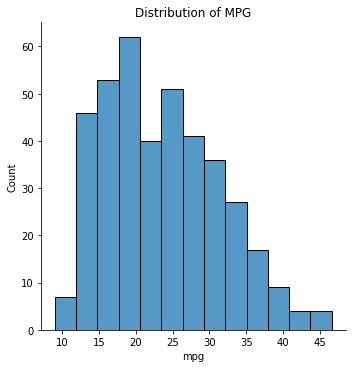

In [11]:
sns.displot(x=df.mpg)
plt.title('Distribution of MPG')
plt.show();

Most MPG is around 20

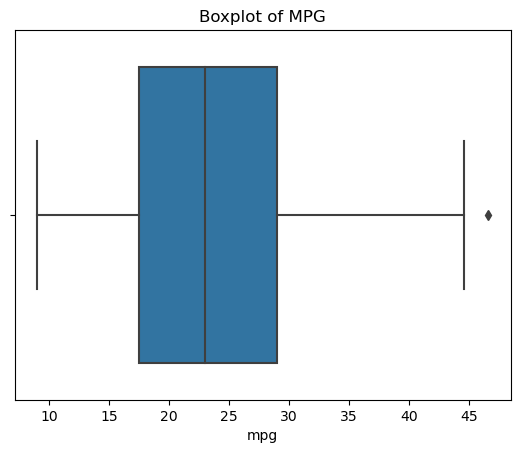

In [12]:
sns.boxplot(x=df.mpg)
plt.title('Boxplot of MPG')
plt.show();

There's one value considered an outlier:

In [13]:
df[df.mpg > 45]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
322,46.6,4,86.0,65.0,2110.0,17.9,80,3,mazda glc


I'm going to leave this in because it's a real value. I guess it appears as an outlier because the data set is so small

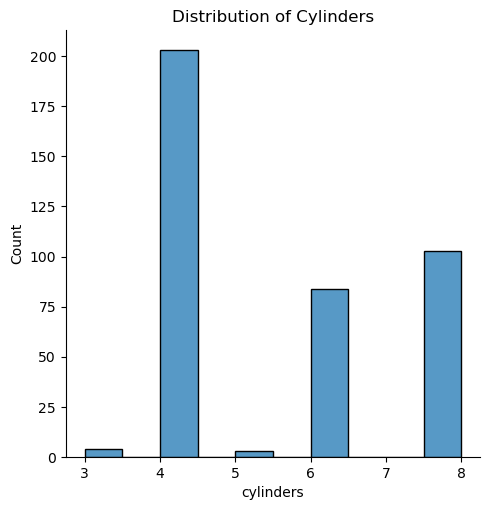

In [14]:
sns.displot(x=df.cylinders)
plt.title('Distribution of Cylinders')
plt.show();

4 Cylinder engines outnumber the others by a lot. It would be nice if we had more info to go off of, particularly if 6 cylinders could be split between inline and V configurations. It's less important for the others cause while inline-8s and V4s exist they're so uncommon in cars of this vintage that we can assume they don't exist. They'll get different fuel economy but not by enough to sway things at the level of accuracy we're at. Inline-6 vs V6 though I think there could be something to see there and it could improve accuracy slightly

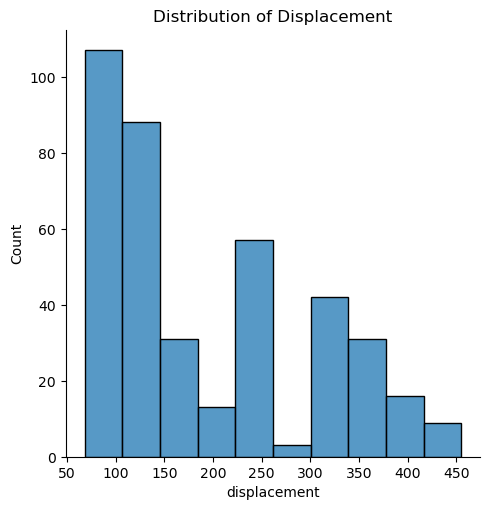

In [15]:
sns.displot(x=df.displacement)
plt.title('Distribution of Displacement')
plt.show();

Most engines in the data are smaller since most of our engines are 4 cylinders. The 3 groups seen here are the split between 4, 6, and 8 cylinders because they all come in generally the same sizes for automotive applications

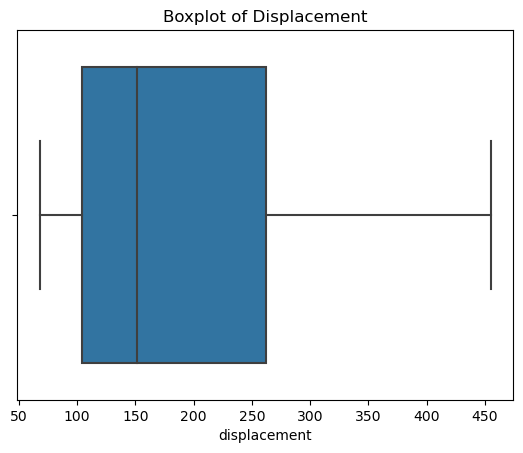

In [16]:
sns.boxplot(x=df.displacement)
plt.title('Boxplot of Displacement')
plt.show();

Again most engines are on the smaller side of the spectrum ranging from around 100ci to around 260ci which is representative of the market

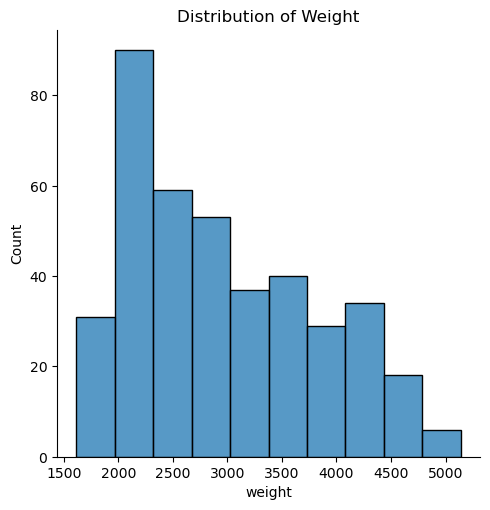

In [17]:
sns.displot(x=df.weight)
plt.title('Distribution of Weight')
plt.show();

Weight is a major player in fuel economy as it takes more energy to move a heavy car. An inefficient engine moving less weight than a highly efficient engine can end up burning more fuel but generally less weight means higher mpg. Most cars here are around 2000lbs, which makes sense because that's about the weight of a typical commuter/economy car from the 70s. They didn't have as much stuff packed into the interior that we have today so they're lighter. That's why some of these MPG numbers may seem high, but they're real

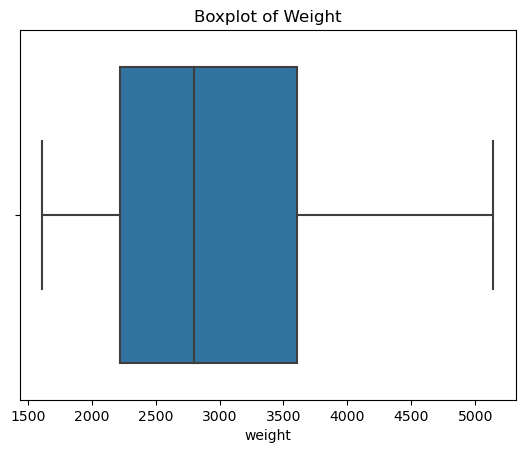

In [18]:
sns.boxplot(x=df.weight)
plt.title('Boxplot of Weight')
plt.show();

Nothing out of the ordinary here

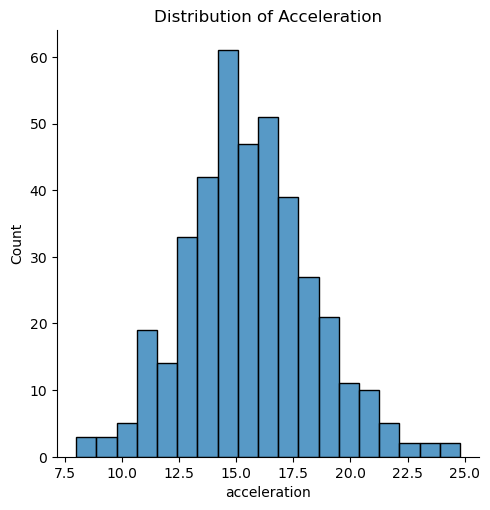

In [19]:
sns.displot(x=df.acceleration)
plt.title('Distribution of Acceleration')
plt.show();

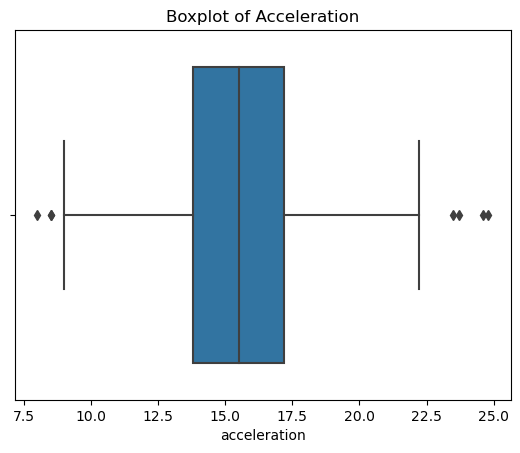

In [20]:
sns.boxplot(x=df.acceleration);
plt.title('Boxplot of Acceleration')
plt.show();

I'm not even sure what acceleration is supposed to be. I assume probably it's 0-60mph time in seconds.. While it's interesting I think it contributes nothing to calculating MPG and looks a bit less than ideal anyway. Everything is close to the same value and there are some outliers

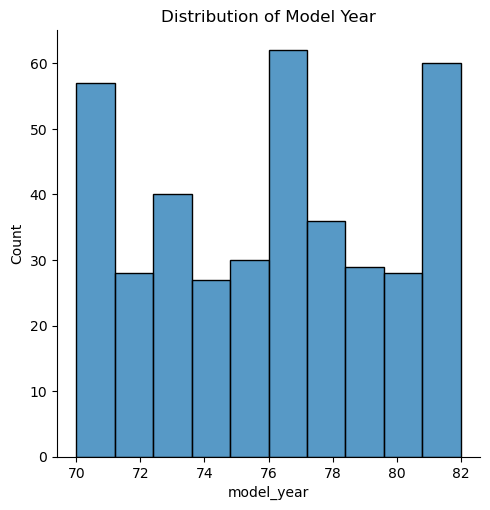

In [21]:
sns.displot(x=df.model_year);
plt.title('Distribution of Model Year')
plt.show();

Model year interestingly has 3 peaks. I'm not going to use this as a feature, not because of this, but because the data only spans 12 years. Model year could be a great indicator of tech but it won't work in this case because there's just not enough data and no real leaps in technology were had in these years anyway. To make predictions on unseen data if the model year is outside 1970-1982 like in the training set then it'll throw the prediction wildly off

### Save

In [22]:
df.to_csv('data/clean.csv', index=False)

[EDA](eda.ipynb)